# Ex 1

Arătaţi echivalenţa dată în exemplul de la pagina 15 a cursului 3. Mai precis, arătaţi că dacă A, B şi C sunt variabile
aleatoare discrete, atunci

$$ A \perp C \mid B $$

dacă şi numai dacă există două funcţii pozitive φA,B, φB,C şi o constantă de normalizare k > 0 astfel încât

$$
P(A = x_A, B = x_B, C = x_C) = \frac{1}{k} \varphi_{A,B}(x_A, x_B) \varphi_{B,C}(x_B, x_C), \quad \forall x_A, x_B, x_C.
$$

Încărcaţi argumentul fie în Markdown/Latex, fie ca foto la foia de lucru.


**Rezolvare**

Daca  $A \perp C \mid B$, trebuie sa aratam ca:

$$
P(A = x_A, B = x_B, C = x_C) = \frac{1}{k} \varphi_{A,B}(x_A, x_B) \varphi_{B,C}(x_B, x_C), \quad \forall x_A, x_B, x_C.
$$

Stim ca distributia comuna se poate scrie ca produsul dintre distributiile marginale conditionate de $B$:

$$
P(A = x_A, B = x_B, C = x_C) = P(A = x_A \mid B = x_B) P(C = x_C \mid B = x_B) P(B = x_B).
$$

Putem considera astfel ca exista doua functii pozitive, fie ele $\varphi_{A,B}(x_A, x_B)$ si $\varphi_{B,C}(x_B, x_C)$, ce sunt asociate cu distributiile conditionate ale lui $A$ si $C$.

Atunci vom putea scrie probabilitatea in raport cu aceste functii:

$$
P(A = x_A, B = x_B, C = x_C) = \frac{1}{k} \varphi_{A,B}(x_A, x_B) \varphi_{B,C}(x_B, x_C), \quad \forall x_A, x_B, x_C.
$$

unde $k > 0$ este o constanta de normalizare ce asigura distributia data este valida (suma tuturor probabilitatilor este 1)



# Ex 2

Considerăm o regiune în care observăm vremea la mai multe staţii meteo, S1, S2, . . . , Sn. Fiecare staţie raportează
una dintre cele trei stări: „Soare”, „Ploaie” sau „Nori”. Vrem să prezicem starea vremii la fiecare staţie meteo, luând în considerare dependenţele dintre staţiile adiacente. Considerăm că vremea la o staţie depinde direct de vremea la staţiile vecine.

Vom folosi o reţea Markoviană pentru a modela vremea la mai multe locaţii şi vom inferea asupra vremii la o staţie
necunoscută, pe baza datelor de la vecini.

**Date de intrare** (introduse de către utilizator):

* numărul de staţii meteo, n;

* muchiile corespunzătoare reţelei Markoviene, adică vecinii fiecărei staţii. Pentru simplitate, vom presupune că reţeaua este aciclică, adică nu există clici de dimensiune 3;

* probabilităţile iniţiale pentru fiecare staţie (exemplu: P(S) = 0.5, P(P) = 0.3, P(N) = 0.2).

Folosind pgmpy, definiţi o reţea Markoviană pentru problema de mai sus, unde potenţialul pentru fiecare pereche de
staţii vecine (adiacente) este dat de matricea:

$$
\begin{bmatrix}
0.7 & 0.2 & 0.1 \\
0.2 & 0.6 & 0.2 \\
0.1 & 0.3 & 0.6
\end{bmatrix}
$$

Folosiţi metoda Maximum A Posteriori (MAP) pentru a prezice starea vremii la fiecare staţie meteo (în pgmpy, puteţi
apela funcţiile BeliefPropagation şi map_query).

In [ ]:
!pip install pgmpy

In [ ]:
import numpy as np
from pgmpy.models import MarkovNetwork
from pgmpy.factors.discrete import DiscreteFactor
from pgmpy.inference import BeliefPropagation


n = int(input("Introduceți numărul de stații meteo (n): "))

edges = []
for i in range(n - 1):
    edges.append((i, i + 1))

P_S = 0.5
P_P = 0.3
P_N = 0.2

transition_matrix = np.array([
    [0.7, 0.2, 0.1],
    [0.2, 0.6, 0.2],
    [0.1, 0.3, 0.6]
])



model = MarkovNetwork()

for i in range(n):
    model.add_node(i)

for edge in edges:
    model.add_edge(edge[0], edge[1])

states = ['Soare', 'Ploaie', 'Nori']
state_dict = {states[i]: i for i in range(len(states))}



for edge in edges:
    i, j = edge
    potential = np.zeros((3, 3))

    for a in range(3):
        for b in range(3):
            potential[a, b] = transition_matrix[a, b]

    factor = DiscreteFactor([i, j], [3, 3], potential.flatten())
    model.add_factors(factor)


for i in range(n):
    initial_prob = [P_S, P_P, P_N]
    factor = DiscreteFactor([i], [3], initial_prob)
    model.add_factors(factor)



inference = BeliefPropagation(model)

map_query = inference.map_query(variables=list(range(n)))

for i in range(n):
    print(f"Stația {i + 1}: {states[map_query[i]]}")


Introduceți numărul de stații meteo (n): 5
Stația 1: Soare
Stația 2: Soare
Stația 3: Soare
Stația 4: Soare
Stația 5: Soare


# Ex 3

O problemă clasică care poate fi rezolvată folosind Markov Random Fields (MRF) este cea a denoising-ului
imaginii, unde obiectivul este de a curăţa o imagine cu zgomot (noise) prin estimarea valorii fiecărui pixel, bazându-ne
pe vecinii săi.

a) Alegeţi mai întâi o imagine de dimensiune foarte mică (de ordinul 5 × 5), pe care să o utilizaţi drept imagine
originală. Imaginea poate fi creată în mod determinist sau aleatoriu.

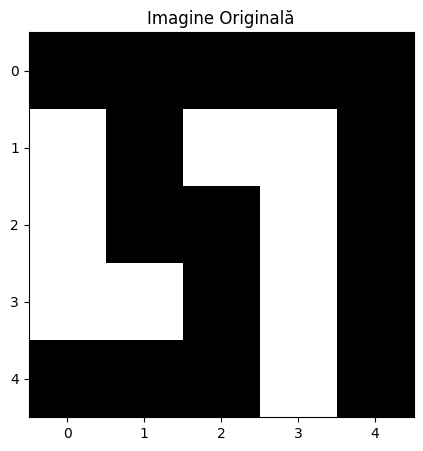

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Imagine deterministă
#original_image = np.array([[1, 0, 1, 0, 1],
#                           [0, 1, 0, 1, 0],
#                           [1, 0, 1, 0, 1],
#                           [0, 1, 0, 1, 0],
#                           [1, 0, 1, 0, 1]])

# Imagine aleatorie
original_image = np.random.randint(0, 2, size=(5, 5))

plt.figure(figsize=(5, 5))
plt.imshow(original_image, cmap='gray')
plt.title("Imagine Originală")
plt.show()


b) Alegeţi la întâmplare un număr de pixeli (în jur de 10%) pentru a fi modificaţi şi creaţi astfel o modificare zgomotoasă a imaginii originale.

Considerăm un grid 2D, în care fiecare nod (pixel) este conectat la cei patru vecini direcţi (N, S, E, W). Energia totală E(x) a unui grid poate fi descrisă de două componente:

* O componentă care penalizează discrepanţele între variabilele observate şi cele latente.

* O componentă care penalizează discrepanţele între pixelii vecini, favorizând o imagine mai uniformă.

Funcţia de energie poate fi scrisă astfel:

$$
E(x) = \sum_{i} \lambda (x_i - y_i)^2 + \sum_{(i,j)} (x_i - x_j)^2
$$

unde

* $x_i$ este pixelul curat de estimat;

* $y_i$ este pixelul observat;

* $λ$ este un factor de regularizare care controlează influenţa zgomotului, ales de utilizator;

* $(i, j)$ reprezintă perechi de pixeli vecini.

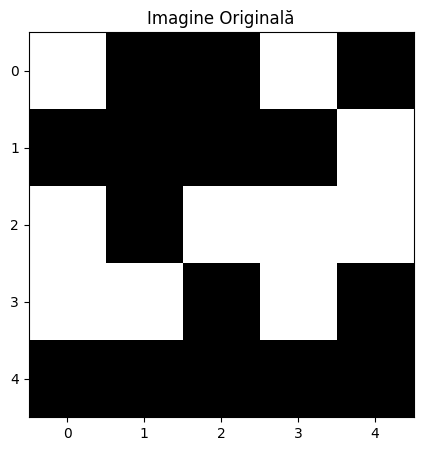

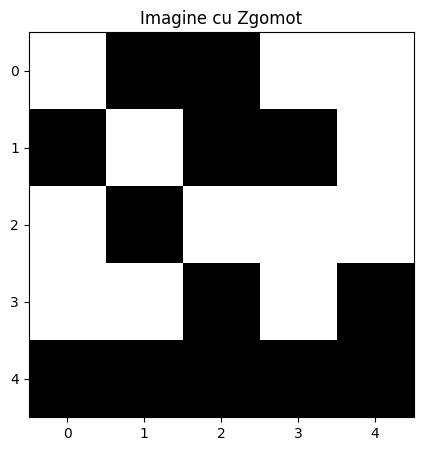


Total Energy: 47.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Imagine aleatorie
original_image = np.random.randint(0, 2, size=(5, 5))

plt.figure(figsize=(5, 5))
plt.imshow(original_image, cmap='gray')
plt.title("Imagine Originală")
plt.show()


# Adauga zgomot
noisy_image = original_image.copy()
num_noisy_pixels = int(0.1 * original_image.size)

coords = np.random.choice(original_image.size, num_noisy_pixels, replace=False)
for coord in coords:
    i, j = divmod(coord, original_image.shape[1])
    noisy_image[i, j] = 1 - noisy_image[i, j]


plt.figure(figsize=(5, 5))
plt.imshow(noisy_image, cmap='gray')
plt.title("Imagine cu Zgomot")
plt.show()



# Funcția de energie
def compute_energy(original_image, noisy_image, lambd):
    energy = 0

    energy += lambd * np.sum((original_image - noisy_image) ** 2)

    rows, cols = original_image.shape
    for i in range(rows):
        for j in range(cols):
            if i > 0:  # vecinul nord
                energy += (noisy_image[i, j] - noisy_image[i-1, j]) ** 2
            if i < rows - 1:  # vecinul sud
                energy += (noisy_image[i, j] - noisy_image[i+1, j]) ** 2
            if j > 0:  # vecinul vest
                energy += (noisy_image[i, j] - noisy_image[i, j-1]) ** 2
            if j < cols - 1:  # vecinul est
                energy += (noisy_image[i, j] - noisy_image[i, j+1]) ** 2

    return energy


lambd = 0.5


energy = compute_energy(original_image, noisy_image, lambd)
print(f"\nTotal Energy: {energy}")


c) Folosind pgmpy, definiţi o reţea Markoviană care sa descrie contextul de mai sus.

In [45]:
from pgmpy.models import MarkovNetwork
from pgmpy.factors.discrete import DiscreteFactor
from pgmpy.inference import BeliefPropagation

import numpy as np


original_image = np.random.randint(0, 2, size=(5, 5))
noisy_image = original_image.copy()

model = MarkovNetwork()


nodes = [(i, j) for i in range(5) for j in range(5)]
model.add_nodes_from(nodes)


for i in range(5):
    for j in range(5):
        if i > 0:  # Vecinul nord
            model.add_edge((i, j), (i-1, j))
        if i < 4:  # Vecinul sud
            model.add_edge((i, j), (i+1, j))
        if j > 0:  # Vecinul vest
            model.add_edge((i, j), (i, j-1))
        if j < 4:  # Vecinul est
            model.add_edge((i, j), (i, j+1))


lambda_param = 0.5

potentials = np.array([[np.exp(0), np.exp(-lambda_param)],
                       [np.exp(-lambda_param), np.exp(0)]])


for edge in model.edges():
    factor = DiscreteFactor(variables=edge, cardinality=[2, 2], values=potentials.flatten())
    model.add_factors(factor)

print(model.check_model())


inference = BeliefPropagation(model)

map_query = inference.map_query()
print(map_query)


True
{(0, 0): 1, (0, 1): 1, (0, 2): 1, (0, 3): 1, (0, 4): 1, (1, 0): 1, (1, 1): 1, (1, 2): 1, (1, 3): 1, (1, 4): 1, (2, 0): 1, (2, 1): 1, (2, 2): 1, (2, 3): 1, (2, 4): 1, (3, 0): 1, (3, 1): 1, (3, 2): 1, (3, 3): 1, (3, 4): 1, (4, 0): 1, (4, 1): 1, (4, 2): 1, (4, 3): 1, (4, 4): 1}


d) Folosiţi metoda Maximum A Posteriori (MAP) pentru a estima imaginea originală pornind de la cea modificată
(la fel ca la Ex. 2, puteţi apela funcţiile BeliefPropagation şi map_query).

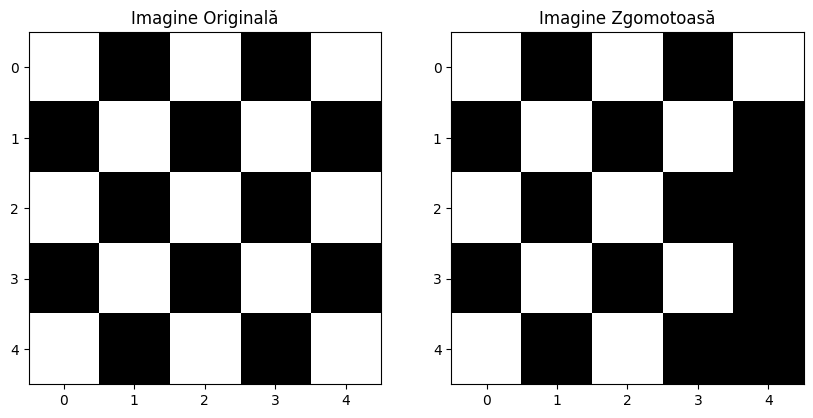

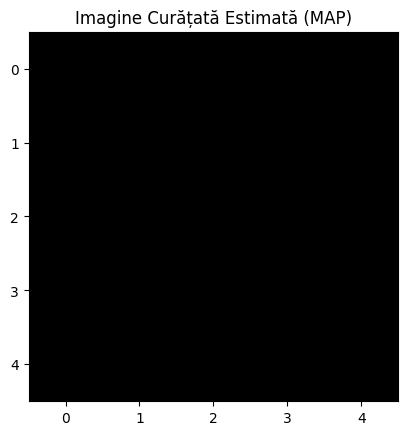

In [50]:
from pgmpy.models import MarkovNetwork
from pgmpy.factors.discrete import DiscreteFactor
from pgmpy.inference import BeliefPropagation
import numpy as np
import matplotlib.pyplot as plt


original_image = np.array([[1, 0, 1, 0, 1],
                           [0, 1, 0, 1, 0],
                           [1, 0, 1, 0, 1],
                           [0, 1, 0, 1, 0],
                           [1, 0, 1, 0, 1]])

noisy_image = original_image.copy()

num_noisy_pixels = int(0.1 * noisy_image.size)
noisy_indices = np.random.choice(noisy_image.size, num_noisy_pixels, replace=False)
noisy_image[np.unravel_index(noisy_indices, noisy_image.shape)] = 1 - noisy_image[np.unravel_index(noisy_indices, noisy_image.shape)]


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(original_image, cmap='gray')
plt.title("Imagine Originală")
plt.subplot(1, 2, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title("Imagine Zgomotoasă")
plt.show()


model = MarkovNetwork()

nodes = [(i, j) for i in range(5) for j in range(5)]
model.add_nodes_from(nodes)


for i in range(5):
    for j in range(5):
        if i > 0:  # Vecin nord
            model.add_edge((i, j), (i-1, j))
        if i < 4:  # Vecin sud
            model.add_edge((i, j), (i+1, j))
        if j > 0:  # Vecin vest
            model.add_edge((i, j), (i, j-1))
        if j < 4:  # Vecin est
            model.add_edge((i, j), (i, j+1))


lambda_param = 0.6

potentials = np.array([[np.exp(0), np.exp(-lambda_param)],
                       [np.exp(-lambda_param), np.exp(0)]])


for edge in model.edges():
    factor = DiscreteFactor(variables=edge, cardinality=[2, 2], values=potentials.flatten())
    model.add_factors(factor)


assert model.check_model()

inference = BeliefPropagation(model)
map_query = inference.map_query()

cleaned_image = np.zeros_like(original_image)
for (i, j), value in map_query.items():
    cleaned_image[i, j] = value


plt.imshow(cleaned_image, cmap='gray')
plt.title("Imagine Curățată Estimată (MAP)")
plt.show()
